<a href="https://colab.research.google.com/github/BharatSingla12/Bike_Sharing_Demand_Prediction_ML_Project/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font size="+3" color='#cc0707'><b>  <u> Seoul Bike Sharing Demand Prediction </u></b>

##  <font size="+1" color='#144c5c'><b> Problem Description:</b> <font size="+1" color='#144c5c'> Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

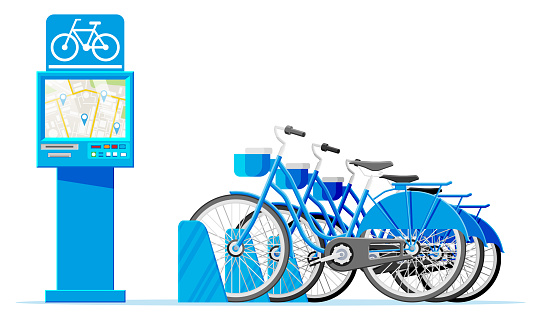


 <a href="https://1drv.ms/p/s!Auc5V0CZ_4fDqy95eJokMFtNBrh6?e=685GfO" target="_blank"> <font size="+2" color='#cc0707'><b> Click here to watch the Persentation  </b> </a>     📊 

## <font size="+3" color='#144c5c'><b> <u>  Data Description </u></b>



<font size="+1" color='#144c5c'>   The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

<font size="+1" color='#144c5c'>  <b><u>Attribute Information: </u></b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours) 

## <font size="+3" color='#144c5c'><b>  <u>Exploratory data analysis</u>

###  <font  size="+2" color='#144c5c'> <b>Importing libraries and packages 

In [1]:
# Import all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Pandas visual setting
pd.set_option('display.max_columns', None)

# To ignore irrelevent warnigns 
import warnings
warnings.filterwarnings('ignore')

# Seaborn setting 
# sns.set_style("white")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


###  <font  size="+2" color='#144c5c'> <b> Lets understand the data and clean it </font>

In [2]:
# Load the Seoul Bike Data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1c1UNscrEvsZeXdxAsuow6y5pkGtvtgPX', encoding= 'unicode_escape')

# Lets view the overall data
df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
df.shape

(8760, 14)

In [4]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Convert the date in datetime format 
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Lets view again 
df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Month  
0             Yes     12  
1             Yes     12  
2             Yes     12  
3             Yes     12  
4             Yes     12

In [6]:
# Lets find the number of NaN values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
dtype: int64

In [7]:
# Check for the duplicate columns
print(f"The duplicate columns are {df.duplicated().sum()}.")

The duplicate columns are 0.


In [8]:
# Get the description of all the numeric and datetime columns
df.describe().iloc[1:,:].T.style.background_gradient(axis=1, gmap=df.describe().iloc[1:,:]['Visibility (10m)'], cmap='YlOrRd').set_precision(2)

In [9]:
# Get list of all the categorical columns
catagorical_columns = df.select_dtypes(include=[object]).columns.to_list()
print("The categorical columns are:")
for i in catagorical_columns:
    print('-> ' + i)   
print()
print()

# Get list of all the numerical columns
Continuous_columns  = df.select_dtypes(include=np.number).columns.to_list()
Continuous_columns.remove('Hour')
Continuous_columns.remove('Month')
print("The numerical columns are:")
for i in Continuous_columns:
    print('-> ' + i)

The categorical columns are:
-> Seasons
-> Holiday
-> Functioning Day


The numerical columns are:
-> Rented Bike Count
-> Temperature(°C)
-> Humidity(%)
-> Wind speed (m/s)
-> Visibility (10m)
-> Dew point temperature(°C)
-> Solar Radiation (MJ/m2)
-> Rainfall(mm)
-> Snowfall (cm)


In [10]:
# Get the list of unique values of categorical columns with their frequencies
print('The unique values of categorical columns with their frequencies are: \n')
for i in catagorical_columns:
    print(df[i].value_counts())
    print("="*35 + "||")

The unique values of categorical columns with their frequencies are: 

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
===================================||
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
===================================||
Yes    8465
No      295
Name: Functioning Day, dtype: int64
===================================||


####  <font  size="+1" color='#144c5c'> <b> Conclusion:  </b>
1. The data is properly formated.
2. There is no null null values.
3. There is no duplicate values.
4. There are 3 categorical columns and 10 numerical columns.

###  <font  size="+2" color='#144c5c'> <b>Finding the insights, patterns and relations

####  <font  size="+1" color='#144c5c'><b>  Univariant Variable Analysis

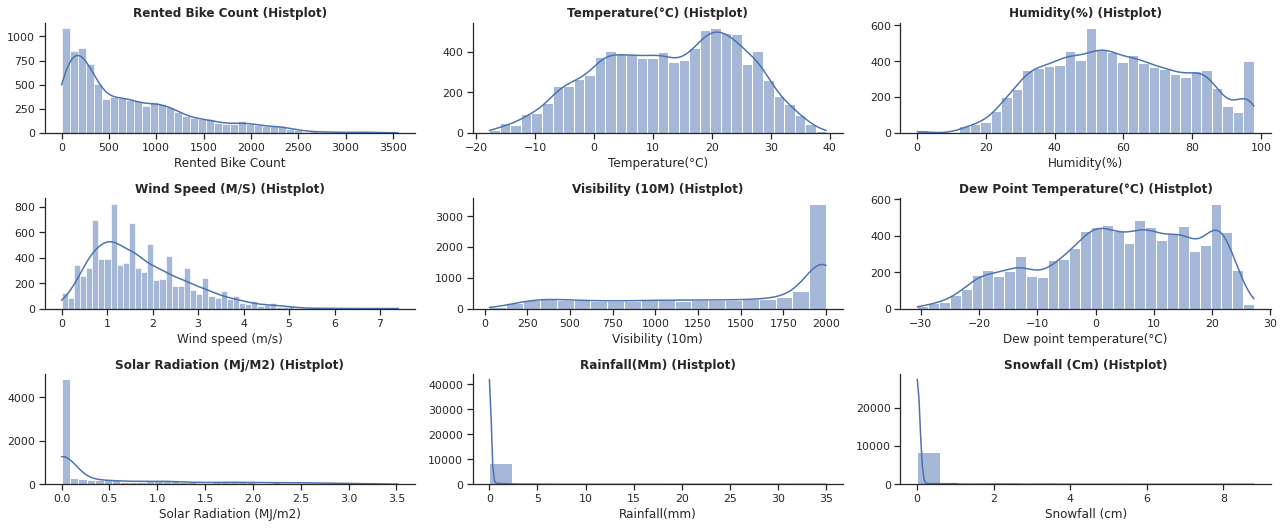

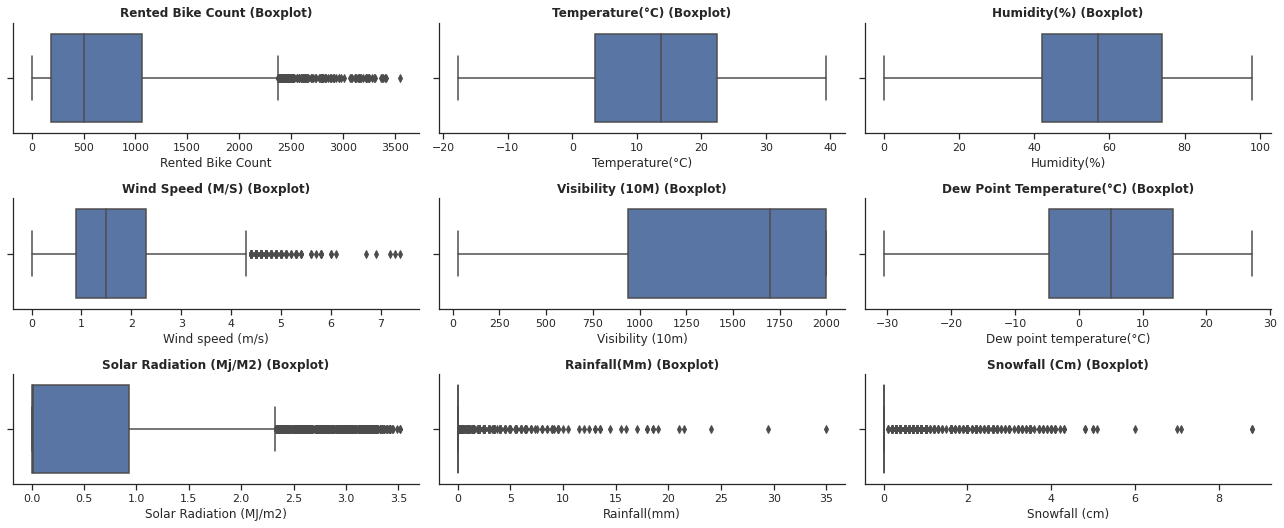

In [11]:
# Lets Visualize the distributions of the Continuous columns using Histogram and Boxplot
plt.figure(figsize=(18,7.5))
for n,column in enumerate(Continuous_columns):
  plt.subplot(3, 3, n+1)
  sns.histplot(df[column], kde=True ).set(ylabel=None)
  plt.title(f'{column.title() + " (Histplot)"}',weight='bold')
  plt.tight_layout()
plt.show()

print()
print()
plt.figure(figsize=(18,7.5))
for n,column in enumerate(Continuous_columns):
  plt.subplot(3, 3, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title() + " (Boxplot)"}',weight='bold')
  plt.tight_layout()
plt.show()

In [12]:
# Function to get amount of outliers in numerical columns
def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Print total outlers and percentage using IQR method
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

# Lets get the amount of outliers in each numerical columns
outlier_prcnt(df, Continuous_columns)

Total outliers in Rented Bike Count are: 158 - 1.8%.
Total outliers in Temperature(°C) are: 0 - 0.0%.
Total outliers in Humidity(%) are: 0 - 0.0%.
Total outliers in Wind speed (m/s) are: 161 - 1.84%.
Total outliers in Visibility (10m) are: 0 - 0.0%.
Total outliers in Dew point temperature(°C) are: 0 - 0.0%.
Total outliers in Solar Radiation (MJ/m2) are: 641 - 7.32%.
Total outliers in Rainfall(mm) are: 528 - 6.03%.
Total outliers in Snowfall (cm) are: 443 - 5.06%.


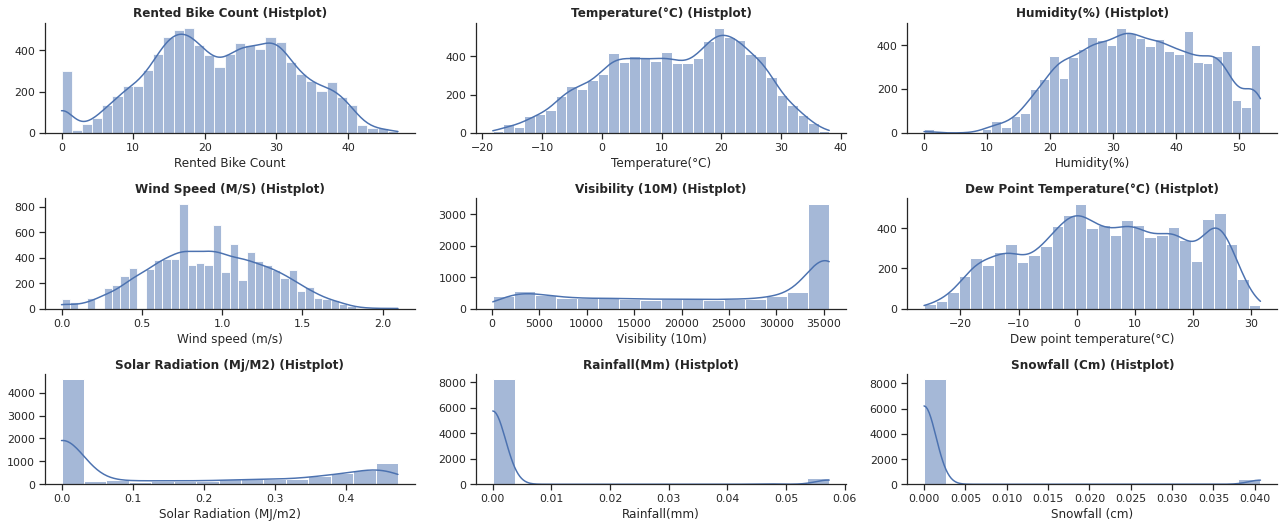

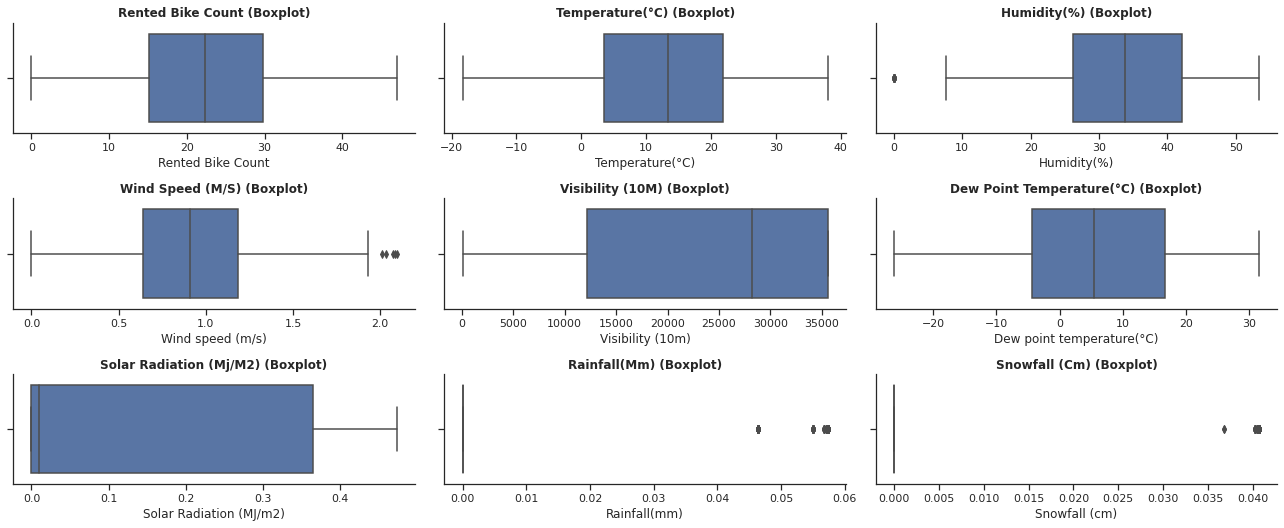

In [13]:
from sklearn.preprocessing import PowerTransformer

# Transform the columns to handle outliers from the data 
pt = PowerTransformer(standardize=False)
df_new = df.copy()
df_new[Continuous_columns] = pt.fit_transform(df[Continuous_columns])

#Visualize the distributions of the Continuous columns using Histogram 
plt.figure(figsize=(18,7.5))
for n,column in enumerate(Continuous_columns):
  plt.subplot(3, 3, n+1)
  sns.histplot(df_new[column], kde=True ).set(ylabel=None)
  plt.title(f'{column.title() + " (Histplot)"}',weight='bold')
  plt.tight_layout()
plt.show()

print()
print()

#Visualize the distributions of the Continuous columns using Boxplot
plt.figure(figsize=(18,7.5))
for n,column in enumerate(Continuous_columns):
  plt.subplot(3, 3, n+1)
  sns.boxplot(df_new[column])
  plt.title(f'{column.title() + " (Boxplot)"}',weight='bold')
  plt.tight_layout()
plt.show()

The distribution looks more normally distributed therefore we can transform all the independent columns and dependend columns later. The transformation also removes outliers, but the column Rainfall and Snowfall have few values that is very high. We can remove outliers from these columns by capping the top 1% values.

In [14]:
# Removing high value outliers from Rainfall and Snowfail by capping the top 1% values 
for col in ['Rainfall(mm)','Snowfall (cm)']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col]) 

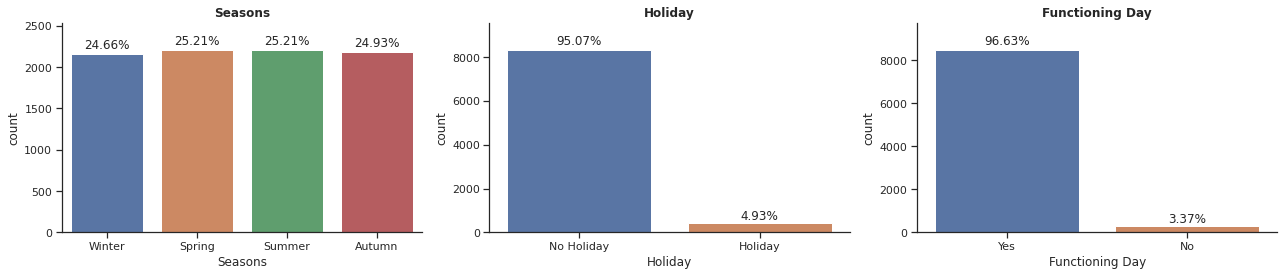

In [15]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

# Plotting the countplots for each target variable
plt.figure(figsize=(18,4))
for n,column in enumerate(catagorical_columns):
    plot = plt.subplot(1,3,n+1)
    sns.countplot(df[column]).margins(y=0.15)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

####  <font  size="+1" color='#144c5c'><b>  Bivariant Variable Analysis

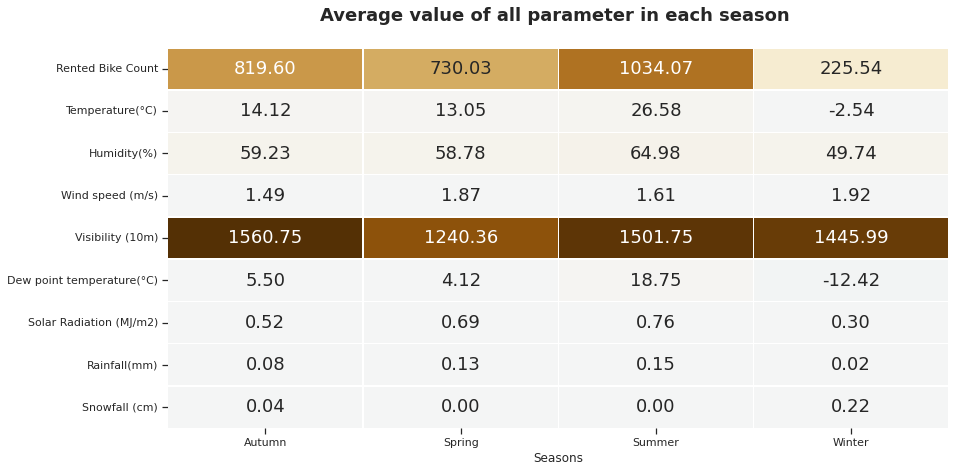

In [16]:
df_grp = df.drop(['Date','Hour','Month'], axis = 1).groupby(by= ['Seasons'], as_index=True).mean().T

plt.figure(figsize=(14,7))
plt.title('Average value of all parameter in each season \n', weight='bold', fontsize=18)
plot = sns.heatmap(df_grp, annot=True, linewidths=.5,linecolor='white',center=0, cmap="BrBG_r",annot_kws = {'size':18},cbar= False,fmt='.2f')
plt.show()

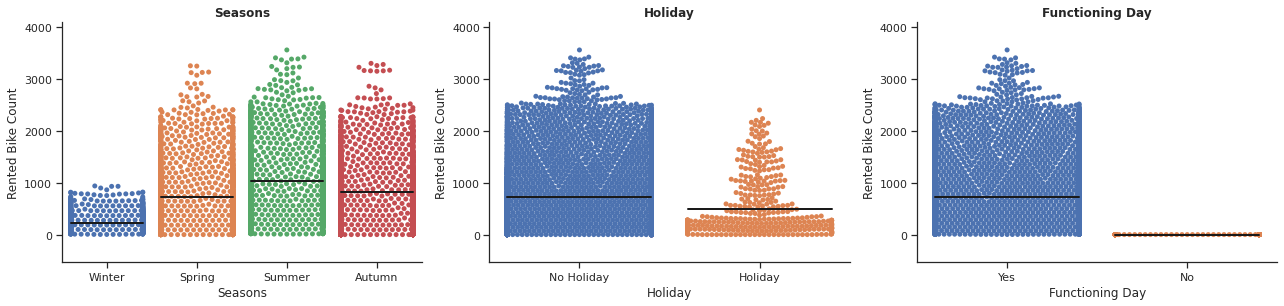

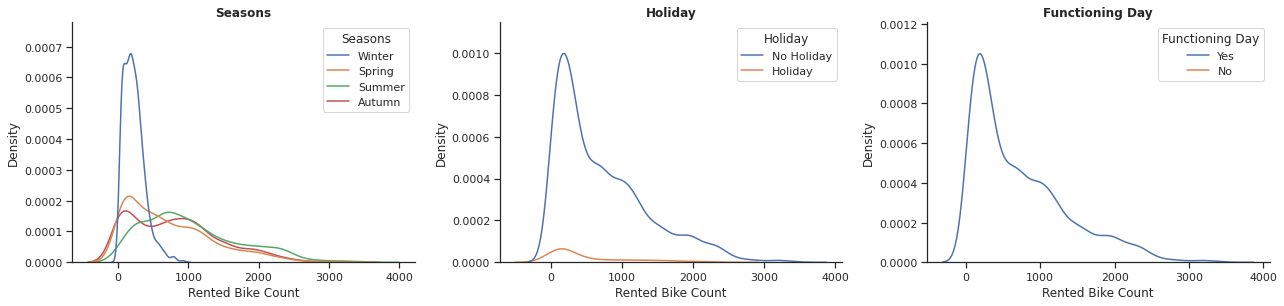

In [17]:
plt.figure(figsize=(18,20))
for n,column in enumerate(catagorical_columns):
    plot = plt.subplot(5,3,n+1)
    # Plot scatter plot for categorical column
    sns.swarmplot(x=df[column], y="Rented Bike Count", data=df).margins(y=0.15)
    # plot the mean line
    sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x=df[column],
                y="Rented Bike Count",
                data=df,
                showfliers=False,
                showbox=False,
                showcaps=False)
    
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

plt.figure(figsize=(18,20))
for n,column in enumerate(catagorical_columns):
  plot = plt.subplot(5,3,n+1)
  sns.kdeplot(data=df, x='Rented Bike Count', hue=df[column]).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

  

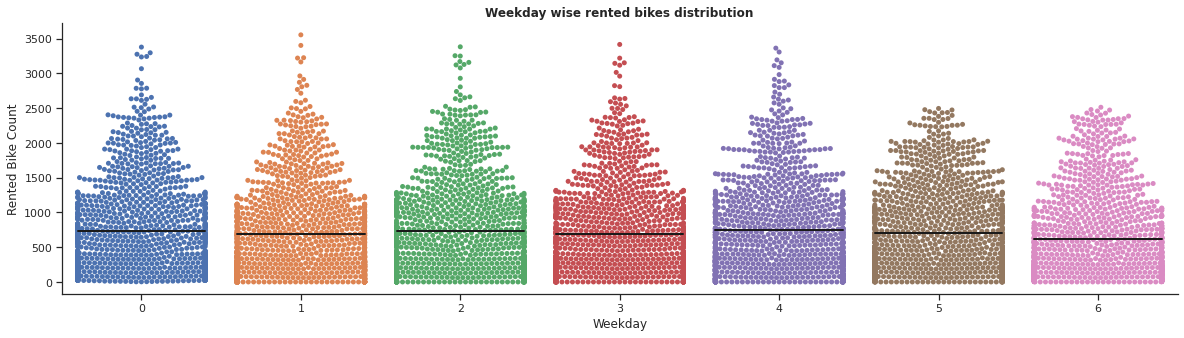

In [18]:
# Lets see weekday wise distribution of rented bike 
df1 = df[['Rented Bike Count','Seasons']]
df1['Weekday'] = pd.DatetimeIndex(df['Date']).weekday

plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
# Plot scatter plot for categorical column
sns.swarmplot(x="Weekday", y="Rented Bike Count", data=df1)
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Weekday",
            y="Rented Bike Count",
            data=df1,
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.title(f'Weekday wise rented bikes distribution',weight='bold')
plt.show()


In [19]:
# Adding new column for weekends  
df['Weekend'] = df['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )

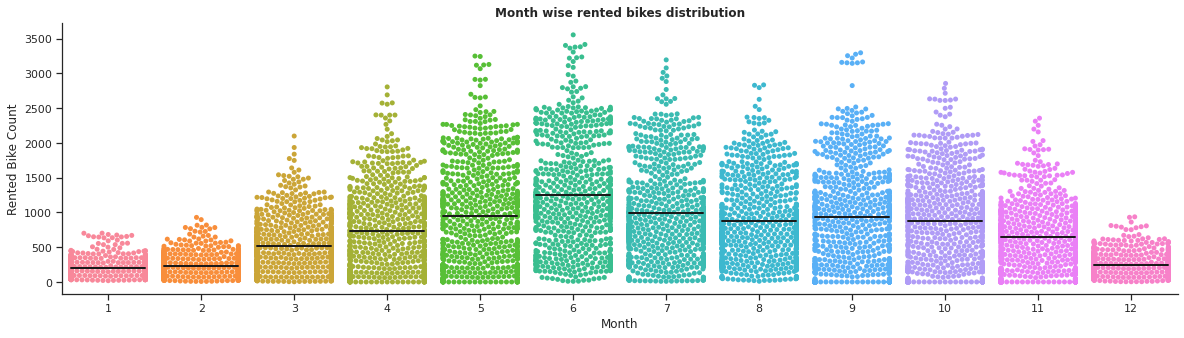

In [20]:
# Lets see month wise distribution of rented bike 
plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
# Plot scatter plot for categorical column
sns.swarmplot(x="Month", y="Rented Bike Count", data=df)
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Month",
            y="Rented Bike Count",
            data=df,
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.title(f'Month wise rented bikes distribution',weight='bold')
plt.show()

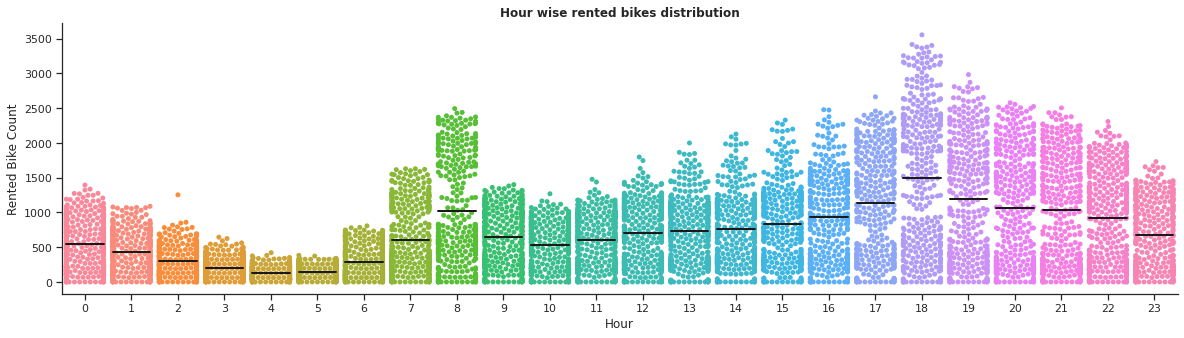

In [21]:
# Lets see hour wise distribution of rented bike 
plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
# Plot scatter plot for categorical column
sns.swarmplot(x="Hour", y="Rented Bike Count", data=df)
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Hour",
            y="Rented Bike Count",
            data=df,
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.title(f'Hour wise rented bikes distribution',weight='bold')

plt.show()

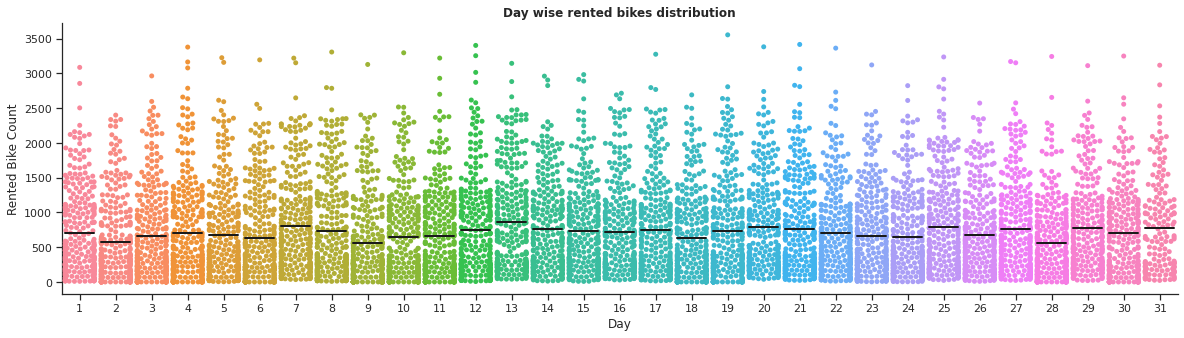

In [22]:
# Lets see weekday wise distribution of rented bike 
df1 = df[['Rented Bike Count','Seasons']]
df1['Day'] = pd.DatetimeIndex(df['Date']).day

plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
# Plot scatter plot for categorical column
sns.swarmplot(x="Day", y="Rented Bike Count", data=df1)
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Day",
            y="Rented Bike Count",
            data=df1,
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.title(f'Day wise rented bikes distribution',weight='bold')

plt.show()


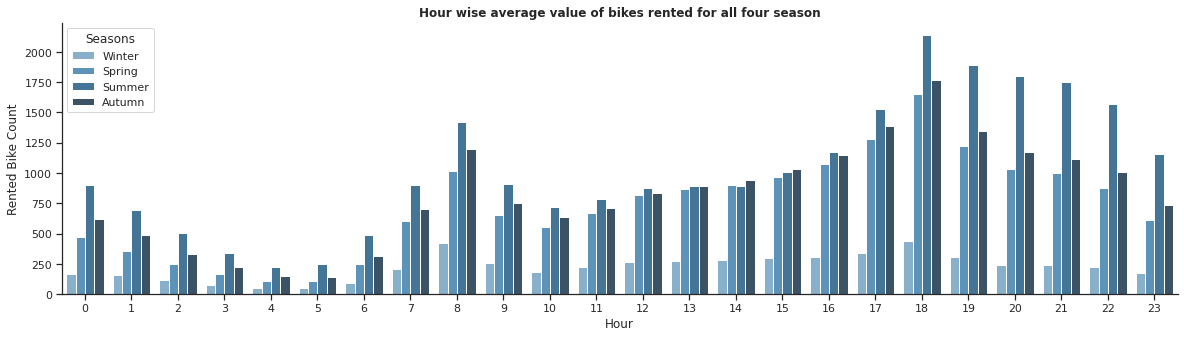

In [23]:
# Bar plot of mean rented bike each Hour
plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
sns.barplot(x="Hour", y="Rented Bike Count", data=df, hue = 'Seasons',ci=None,palette="Blues_d")
plt.title(f'Hour wise average value of bikes rented for all four season',weight='bold')

plt.show()

####  <font  size="+1" color='#144c5c'><b> Multivariate Analysis </font >

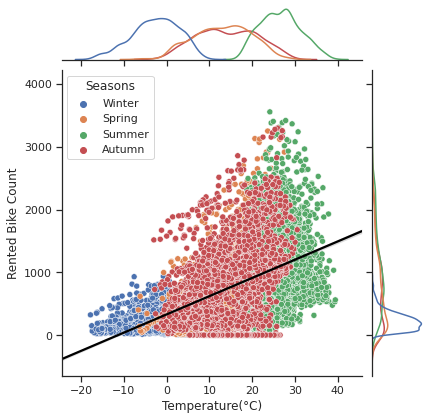

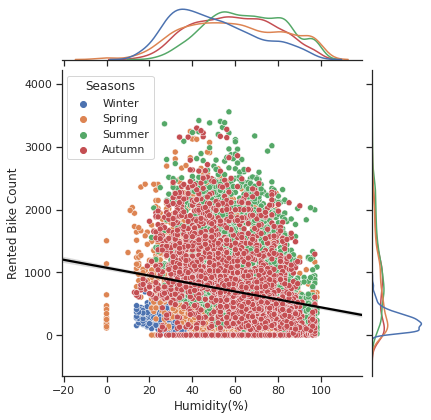

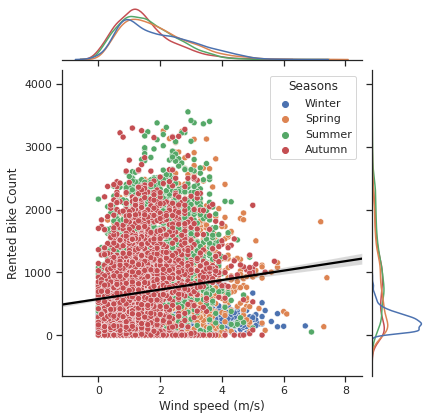

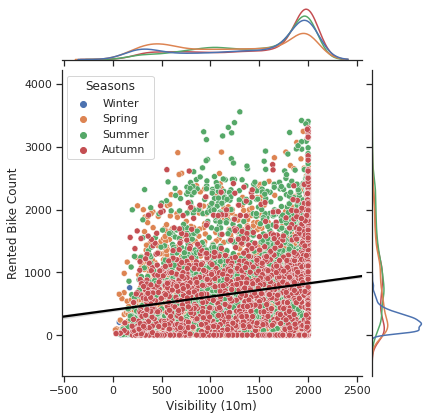

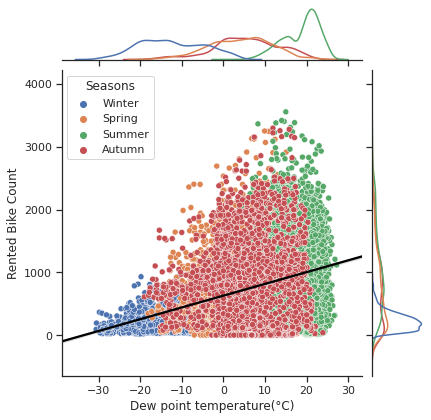

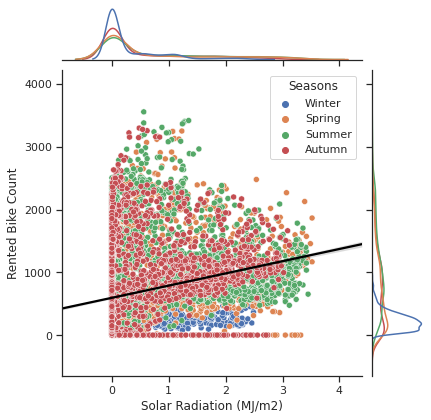

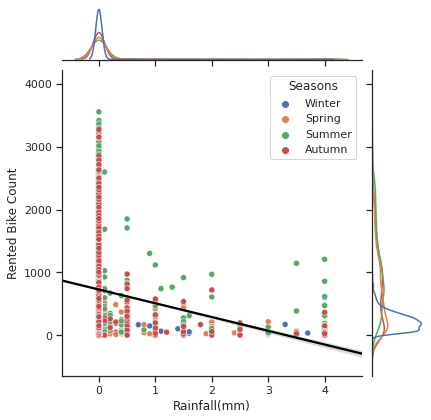

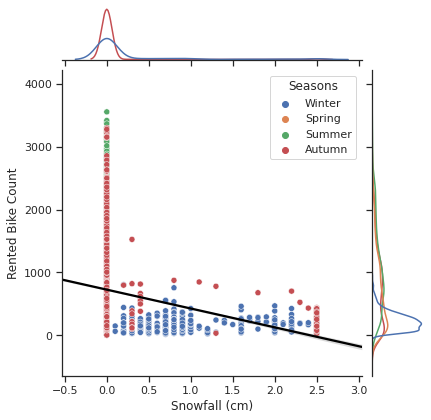

In [24]:
for col in Continuous_columns[1:]:
    g = sns.JointGrid(x=df[col],y='Rented Bike Count',data=df, hue="Seasons")
    g.plot(sns.scatterplot, sns.kdeplot)
    sns.regplot(data=df, x=df[col], y="Rented Bike Count", ax=g.ax_joint, scatter=False, color="black", truncate=False)
    plt.show()

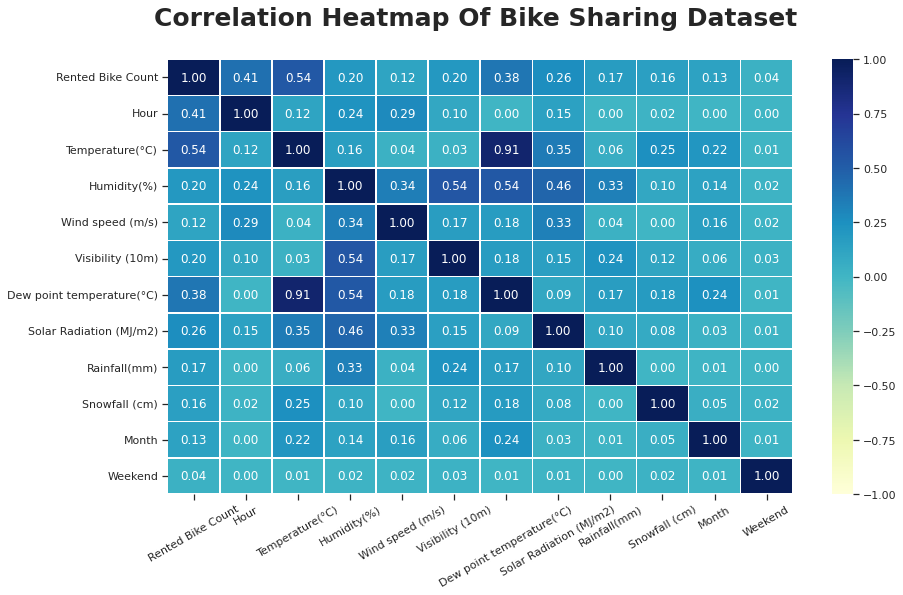

In [25]:
# Correlation Analysis
plt.figure(figsize=(14,8))
plot = sns.heatmap(abs(df.corr()), annot=True,vmin=-1, center = 0, cbar= True,linewidths=.5,linecolor='white',cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap Of Bike Sharing Dataset \n', weight='bold', fontsize = 25)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.show()

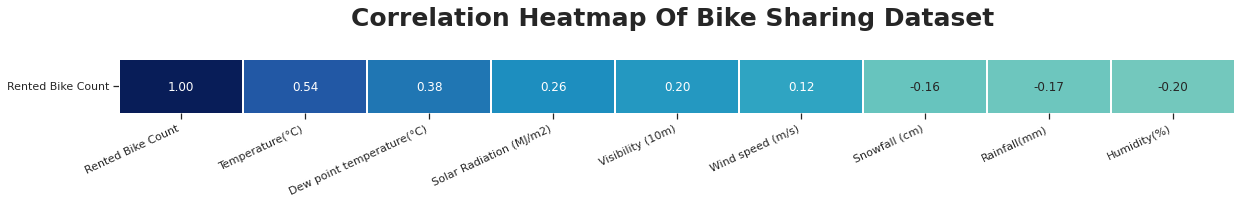

In [26]:
# Correlation Analysis only for target variabel 
Target_corr  = df[Continuous_columns].corr().loc[:, 'Rented Bike Count'].to_frame().sort_values(by = 'Rented Bike Count' , ascending=False).T
plt.figure(figsize=(20,1))
plot = sns.heatmap(Target_corr, annot=True,vmin=-1, center = 0, cbar= False,linewidths=.5,linecolor='white',cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap Of Bike Sharing Dataset \n', weight='bold', fontsize = 25)
plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

####  <font  size="+1" color='#144c5c'><b>  Conclusion


**Univariable analsis:**
- The Rented Bike count is right skewed, it means there are only few times when the demand of bikes is very high.
- The hours are evenly distibuted.
- The Temperature, and Humidity are alsmost symetrically distributed.
- The wind speed is right distributed, it means that there are sometimes when the windspeed is high.
- The visibility is left skewed, it means there are sometimes when the visibility is low.
- Dew point temperature is slightly left distributed.
- Solar radiation is right distributed, so there are sometimews when the solar radiation is very high.
- The Rainfall is also right distributed, so there are sometimews when the rainfall is very high.
- The snowfall is also right distributed, so there are sometimews when the snowfall is very high.
Here the most of the variable are skewed, which probably are the reason for the skewness in the rented bikes.

- There are 95.07% times no holiday.
- The functioning day are 96.63%. 
- There are a total of 4 seasons each carries the same weightage.


**Barplot of mean rented bikes and season:**
- The demand is very high in summer and lowest in winter.
- Demand: Summer > Autumn > Spring > Winter 
- The demand in summer is 36.8% and demand in spring is 26% and in Autumn is 29% but demand in winter is just 8.03%. 

**Barplot of mean demand and Holiday:**
- The average per hour demand in non holiday is 58.87% and in Holiday is 41.13%.

**Barplot of mean rented bikes and month:**
- The demand is very high in 6th month and very low in the 1st month.
- The demand increases from low to high and decreases gradually from high to low..

**Barplot of mean rented bikes and hour:**
- The demand is very high around 8 and 18 and the demand is very low around 4, and 10. 
- The demand increase and decrease gradually.
- The demand is low at 4 and then it gradually increases till 8 and aftward it gradually decreases till 10 and then again gradually increase till 18 and then gradually decreases till 4.
- For all the seasons, the demand is follows the above pattern. So, it means that the demand of bikes is not much influenced by the change in daily weather 


**Weater analysis - Scatter plot:**
By scatter plot it is clear that some of weather paramete are very linear in nature to demand but some are not. To get clear picture, we can use correlation heatmap.

**Weater analysis - Correlation matrix**
- The temperature, and Dew point temperature are very highly positive correlated to the rented bikes so the demand of bikes increases as the temperature or dew point temperature increaes.
- The solar radiation, and visibility positively correlated to the rented bikes so the demand of bikes increases if the solar radiation or visibility increases.
- The wind speed is little positively correlated to the rented bikes.
- The rainfall, Snowfall, and Humidity are negative correlated to the rented bikes so the demand of bikes decreases if the rainfall, Snowfall, or Humidity increases.

- **Positive correlated:** Temperature > Dew point temperature > Solar Radiation > Visibility > Wind

- **Negative correlated:** Rainfall > Snowfall > Humidity

##  <font  size="+3" color='#144c5c'> <b><u>  Data Prepossessing

####  <font  size="+1" color='#144c5c'><b> Checking for Multicollinearity

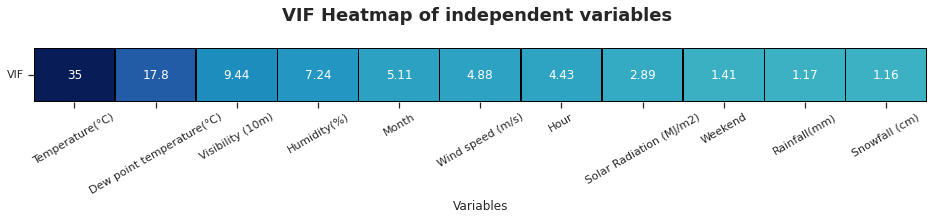

In [27]:
# Check for the Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"]       = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif              = vif.sort_values(by='VIF',ascending=False).set_index('Variables')

    # Plot Heatmap
    plt.figure(figsize=(16,1))
    plt.title('VIF Heatmap of independent variables \n', weight='bold', fontsize=18)
    plot = sns.heatmap(vif.T, annot=True, linewidths=.5,linecolor='Black',center=0,  vmin = -1, cmap="YlGnBu",cbar=False,fmt='.3g')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
    plt.show()

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

In [28]:
# Remove the multicoliner variable
df = df.drop('Dew point temperature(°C)',axis = 1)

# Droping redundant column
df = df.drop('Date',axis = 1)
df = df.drop('Seasons',axis = 1)

####  <font  size="+1" color='#144c5c'><b> Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Separating dependent and independent variables 
dependent_variable    = ['Rented Bike Count']
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]

# Splitting the data into train and test
X = df[independent_variables]
y = df[dependent_variable]

X_train, X_test, y_train_0, y_test_0 = train_test_split(X, y, test_size = 0.2, random_state = 22)

####  <font  size="+1" color='#144c5c'><b>  Treat the skewness of independent and dependent columns

In [30]:
from sklearn.preprocessing import PowerTransformer

# Treat the skewness and normalize the independent columns
skew_col = ['Temperature(°C)',  'Humidity(%)',  'Wind speed (m/s)',  'Visibility (10m)',  'Solar Radiation (MJ/m2)',  'Rainfall(mm)',  'Snowfall (cm)']

pt1 = PowerTransformer(standardize=True)
X_train[skew_col] = pt1.fit_transform(X_train[skew_col])
X_test[skew_col]  = pt1.transform(X_test[skew_col])

# Treat the skewness and dependent column
y_train = np.sqrt(y_train_0)
y_test  = np.sqrt(y_test_0)


# pt2 = PowerTransformer(method = 'box-cox', standardize=False)
# y_train = pt2.fit_transform(y_train+1)
# y_test  = pt2.transform(y_test+1)

# # # Function to transfer back the bike count
# # def transform_back_y(_target_column):
# #     return (_target_column *pt2.lambdas_[0] + 1) ** (1 / pt2.lambdas_[0]) - 1

####  <font  size="+1" color='#144c5c'><b>  Feature Encoding

In [32]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 789 kB/s 


In [33]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary  import BinaryEncoder

# Set up the OrdinalEncoder
mapping = [{'col': 'Holiday', 'mapping': {'Holiday':1, 'No Holiday':0}}, {'col': 'Functioning Day', 'mapping': {'Yes':1, 'No': 0} }]
OE = OrdinalEncoder(mapping = mapping)
# Fit and transform the encoder
X_train = OE.fit_transform(X_train)
X_test  = OE.transform(X_test)


# Set up the encoder
OH = OneHotEncoder(cols = ['Hour'])
# Fit and transform the encoder
X_train = OH.fit_transform(X_train)
X_test  = OH.transform(X_test)


# Set up the encoder
BE = BinaryEncoder(cols = ['Month'])
# Fit and transform the encoder
X_train = BE.fit_transform(X_train)
X_test  = BE.transform(X_test)

In [34]:
# Separating dependent and independent variables 
independent_variables = [i for i in X_train.columns]
dependent_variable    = ['Rented Bike Count']

In [35]:
X_train.columns

Index(['Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_24',
       'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Month_0', 'Month_1',
       'Month_2', 'Month_3', 'Weekend'],
      dtype='object')

In [36]:
X_train.shape

(7008, 38)

In [37]:
len(X_train)

7008

####  <font  size="+1" color='#144c5c'><b>  Reduce the memory size

In [38]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    #print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            '''
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            '''
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append
                (col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            '''
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
            '''
    # Print final result
    # print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    # print("Memory usage is: ",mem_usg," MB")
    print("The dataframe is reduced to ",round(100*mem_usg/start_mem_usg),"% of the initial size.")
    return props


X_train = reduce_mem_usage(X_train)
X_test  = reduce_mem_usage(X_test)

The dataframe is reduced to  21 % of the initial size.
The dataframe is reduced to  21 % of the initial size.


In [39]:
X_train.shape

(7008, 38)

In [40]:
X_train.columns

Index(['Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_24',
       'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Month_0', 'Month_1',
       'Month_2', 'Month_3', 'Weekend'],
      dtype='object')

##  <font  size="+3" color='#144c5c'> <b><u> Machine learning

###  <font  size="+1" color='#144c5c'><b> Importing ML modules and packages

In [41]:
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, make_scorer,mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

###  <font  size="+1" color='#144c5c'><b> Defining Important functions for model evaluation

In [42]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test, feature, plotgraph = True):
        
    '''
    Takes regression model and train test splits as input and prints the
    evaluation matrices with the plot and returns the model
    
    Parameters
    ----------
    model     : ML Model 
    X_train   : Training independent columns
    y_train   : Training target column
    X_test    : Testing independent columns
    y_test    : Testing target columns
    feature   : Name of independent columns
    plotgraph : Plot the graph
    
    Returns
    -------
    It gives regression report and feature importances.
    '''
 
    # Fitting the model
    model.fit(X_train,y_train)
    y_train = (y_train)**2
    y_test  = (y_test)**2

    # Calculate and Print Evaluation Matrix
    y_train_pred = (model.predict(X_train))**2
    MSE_train    = mean_squared_error(y_train,y_train_pred)
    RMSE_train   = np.sqrt(MSE_train)
    MAE_train    = mean_absolute_error(y_train,y_train_pred)
    MAPE_train   = mean_absolute_percentage_error(y_train,y_train_pred)
    R2_train     = r2_score(y_train,y_train_pred)
    AR2_train    = 1-(1-R2_train)*((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))

    y_test_pred = (model.predict(X_test))**2
    MSE_test    = mean_squared_error(y_test,y_test_pred)
    RMSE_test   = np.sqrt(MSE_test)
    MAE_test    = mean_absolute_error(y_test,y_test_pred)
    MAPE_test   = mean_absolute_percentage_error(y_test,y_test_pred)
    R2_test     = r2_score(y_test,y_test_pred)
    AR2_test    = 1-(1-R2_test)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

    Evaluate_matrx = {'Train': [round(MSE_train , 2), round(RMSE_train, 2), round(MAE_train , 2), round(R2_train , 2), round(AR2_train , 2)],
                      'Test' : [round(MSE_test , 2) , round(RMSE_test, 2) , round(MAE_test , 2) , round(R2_test  , 2), round(AR2_test  , 2)]}
    Evaluate_df   = pd.DataFrame(Evaluate_matrx, index= ['MSE', 'RMSE', 'MAE', 'R²', 'Adj. R²'])
    print(Evaluate_df)
    print()
    print(f"The cross validation R² Score is {cross_validation_r2(model)}.")
    

    if plotgraph:
        # Plotting actual and predicted values and the feature importances:
        plt.figure(figsize=(18,3))

        plt.plot((y_test_pred)[:150])
        plt.plot((np.array(y_test)[:150]))
        plt.legend(["Predicted","Actual"])
        plt.title('Actual vs Predicted Target Variable', fontsize = 18)
        plt.show()

        # Feature importance of the model 
        feature_imprtanc(model, feature)

    return model

def feature_imprtanc(model, feature):
    try:
        try:
            importance = model.feature_importances_
        except:
            importance = np.abs(model.coef_[0])
        indices = np.argsort(importance)
        indices = indices[::-1]
        # Plot feature importance
        plt.figure(figsize=(18,3))
        plt.bar(range(len(indices)),importance[indices])
        plt.xticks(range(len(indices)), [feature[i] for i in indices],  rotation=90,horizontalalignment='center')
        plt.title('Feature Importance', fontsize = 18)
        plt.show()
    except:
        pass 


def Compare_model():
    models = ['LR','DT','RF','GB','XGB', 'KNN', 'ADA', 'HGB']
    train_error = []
    test_error  = []
    cv_error    = []

    LR  = LinearRegression()
    DTR = DecisionTreeRegressor(random_state=2)
    RNF = RandomForestRegressor(random_state=2) 
    GBR = GradientBoostingRegressor(random_state=2)
    XGB = XGBRegressor(random_state=2,objective='reg:squarederror')
    KNN = KNeighborsRegressor()
    ADA = AdaBoostRegressor()
    HGB = HistGradientBoostingRegressor()
    model_trained = [LR, DTR, RNF, GBR, XGB, KNN, ADA, HGB]
    
    for model in model_trained:
        model.fit(X_train, y_train)
        train_error.append(round(r2_score(y_train**2 , model.predict(X_train)**2),2))
        test_error.append (round(r2_score(y_test**2  , model.predict(X_test )**2),2))
        cv_error.append(cross_validation_r2(model))

    Eval_df = pd.DataFrame(data={'Train R²':train_error,'Test R²':test_error,'CV R²':cv_error}, index=models)
    Eval_df = Eval_df.sort_values(by=["Test R²"], ascending = False) 
    Eval_df[Eval_df < 0] = 0
    fig, ax = plt.subplots(1, 2, figsize=(13.5, 3.5))
    Eval_df.plot(kind='bar', ax = ax[0]).set(title="Bar Plot Compairsion")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, horizontalalignment='center')

    sns.heatmap(Eval_df.T, annot=True, linewidths=1, ax = ax[1], center = 0,linecolor='Black',cbar=False).set(title="Heat Map Compairsion")
    plt.suptitle('Compairsion of R2 of various Models',weight='bold')
    plt.tight_layout()
    plt.show()

def cross_validation_r2(_regressor):
    model = Pipeline([
        ('ttr', TransformedTargetRegressor(regressor=_regressor, func=np.sqrt, inverse_func=np.square))
        ])
    return round(cross_val_score(model, X_train, y_train_0, cv=5, scoring = 'r2').mean(),3)

###  <font  size="+1" color='#144c5c'><b> Machine learning Model Testing 

            Train      Test
MSE      96530.18  97123.89
RMSE       310.69    311.65
MAE        212.46    211.79
R²           0.77      0.77
Adj. R²      0.77      0.76

The cross validation R² Score is 0.764.


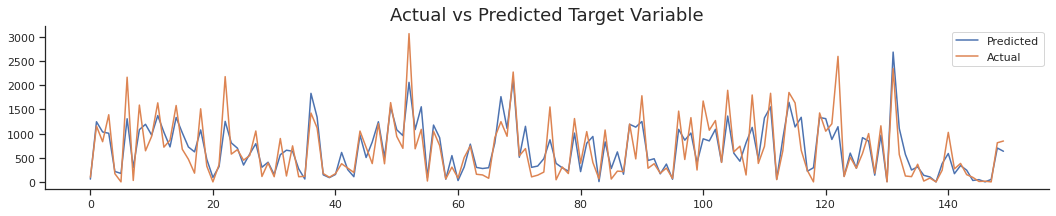

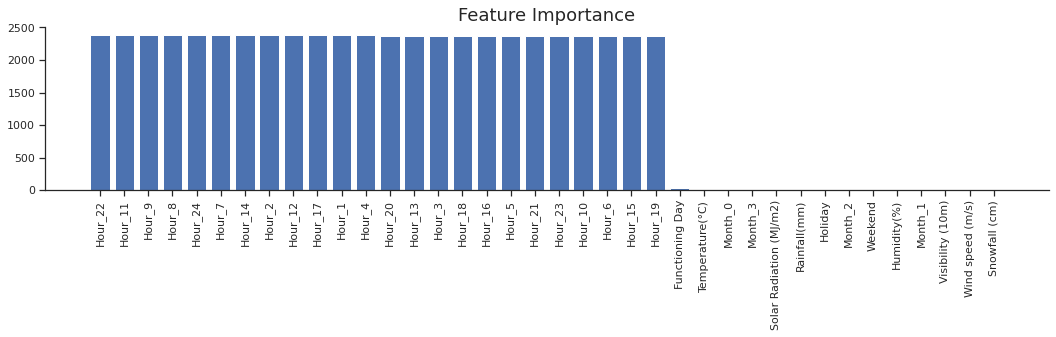

In [43]:
# Define the Regressor model
lr = LinearRegression()
# Analysing the regression model 
LR = analyse_model(lr, X_train, X_test, y_train, y_test, feature = independent_variables, plotgraph = True)

         Train      Test
MSE        0.0  65319.41
RMSE       0.0    255.58
MAE        0.0    147.51
R²         1.0      0.84
Adj. R²    1.0      0.84

The cross validation R² Score is 0.821.


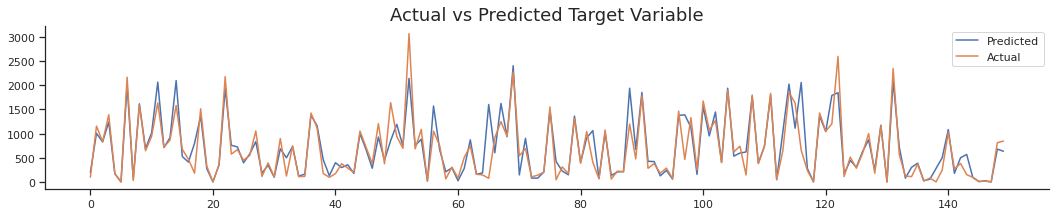

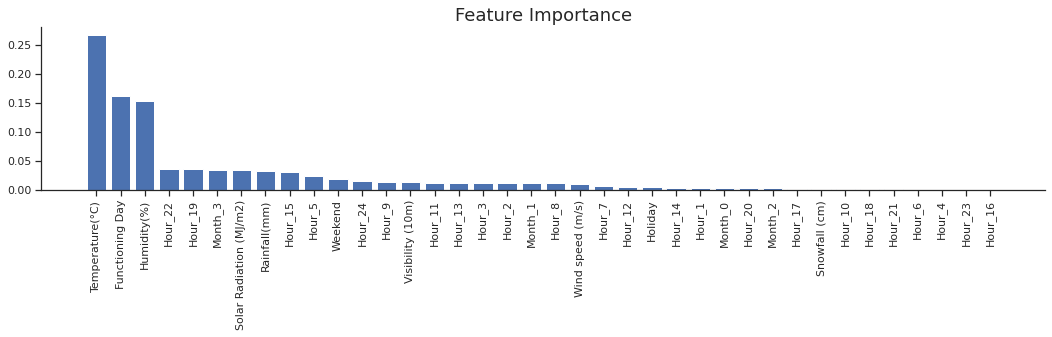

In [44]:
# Define the Regressor model
regressor = DecisionTreeRegressor(random_state=2)
# Analysing the regression model 
DTR = analyse_model(regressor, X_train, X_test, y_train, y_test, independent_variables, plotgraph = True)

           Train      Test
MSE      4775.81  34094.27
RMSE       69.11    184.65
MAE        40.99    110.62
R²          0.99      0.92
Adj. R²     0.99      0.92

The cross validation R² Score is 0.909.


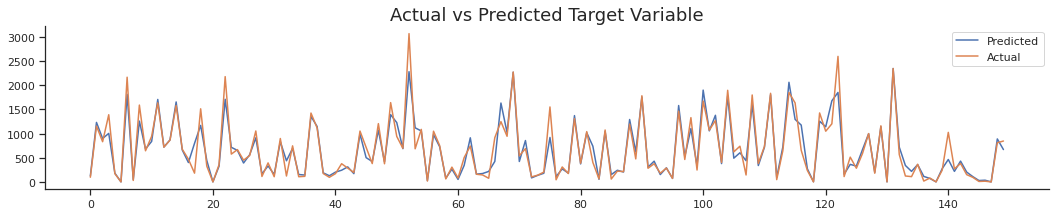

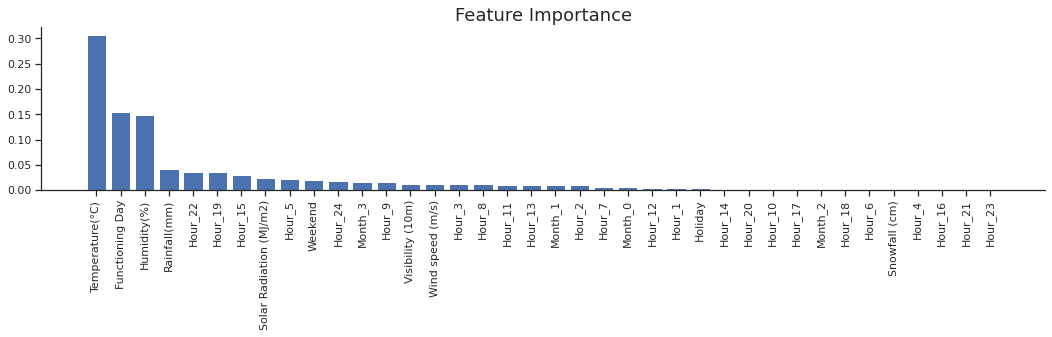

In [45]:
# Define the Regressor model
regressor = RandomForestRegressor(random_state=2)
# Analysing the regression model 
RNF = analyse_model(regressor, X_train, X_test, y_train, y_test, independent_variables, plotgraph = True)

            Train      Test
MSE      66618.24  72385.75
RMSE       258.11    269.05
MAE        171.02    179.21
R²           0.84      0.83
Adj. R²      0.84      0.82

The cross validation R² Score is 0.828.


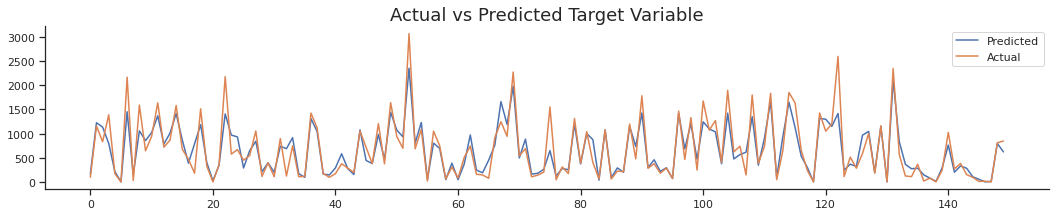

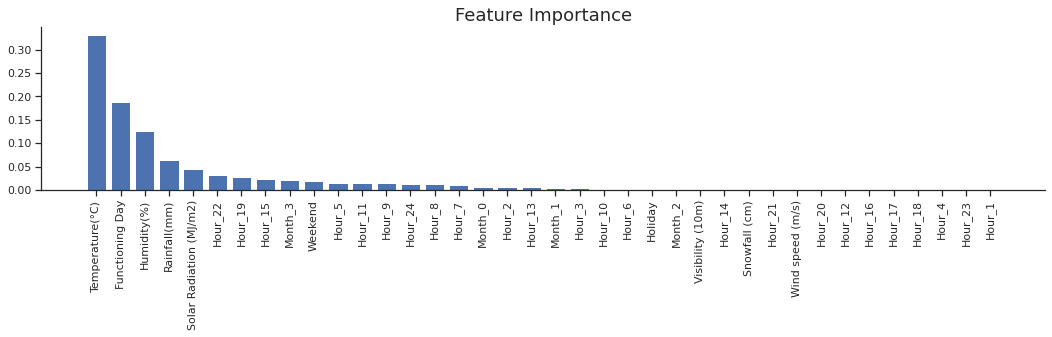

In [46]:
# Define the Regressor model
regressor = GradientBoostingRegressor(random_state=2)
# Analysing the regression model 
GBR = analyse_model(regressor, X_train, X_test, y_train, y_test, independent_variables, plotgraph = True)

            Train      Test
MSE      67410.47  72306.29
RMSE       259.64    268.90
MAE        171.50    178.72
R²           0.84      0.83
Adj. R²      0.84      0.82

The cross validation R² Score is 0.824.


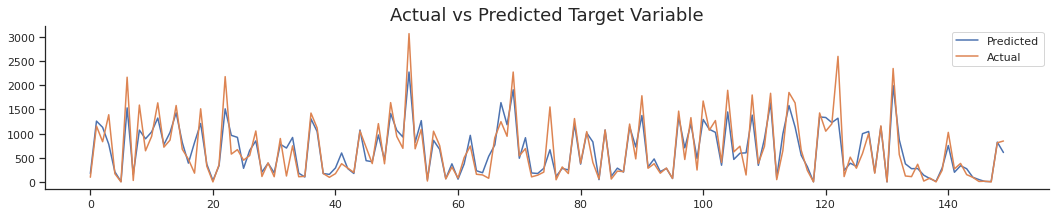

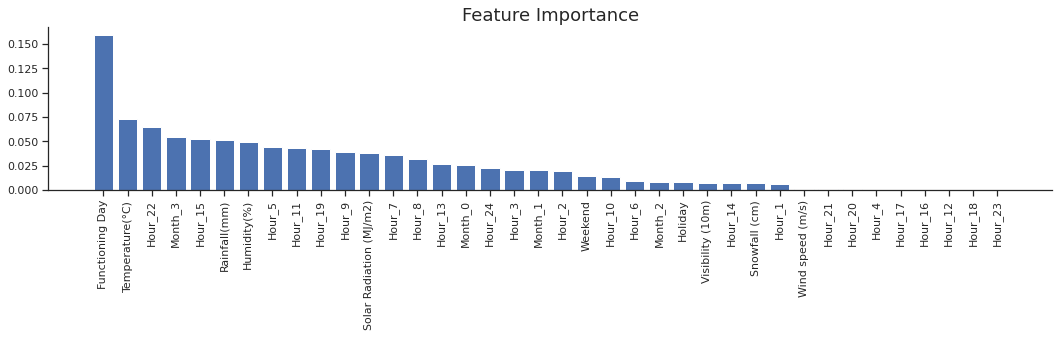

In [47]:
# Define the Regressor model
regressor = XGBRegressor(random_state=2,objective='reg:squarederror')
# Analysing the regression model 
XGB = analyse_model(regressor, X_train, X_test, y_train, y_test, independent_variables, plotgraph = True)

           Train      Test
MSE      1452.39  30590.02
RMSE       38.11    174.90
MAE        30.27    106.30
R²          1.00      0.93
Adj. R²     1.00      0.93

The cross validation R² Score is 0.918.


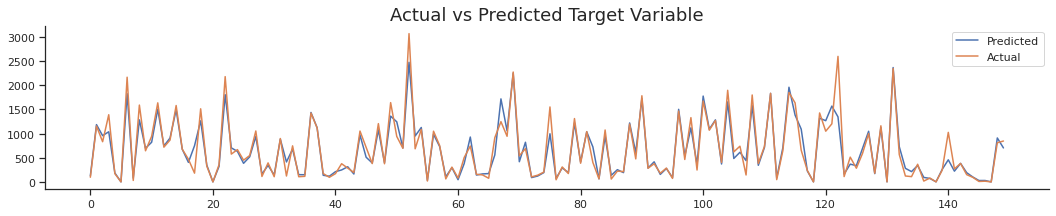

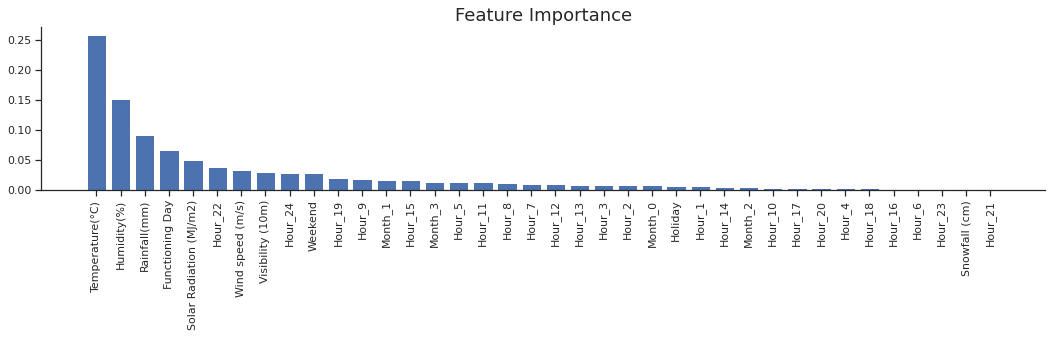

In [48]:
# Define the Regressor model
regressor = AdaBoostRegressor(base_estimator=RandomForestRegressor(random_state=2), random_state=2)
# Analysing the regression model 
ADA = analyse_model(regressor, X_train, X_test, y_train, y_test, independent_variables, plotgraph = True)

            Train      Test
MSE      44221.30  62992.36
RMSE       210.29    250.98
MAE        128.31    155.98
R²           0.89      0.85
Adj. R²      0.89      0.85

The cross validation R² Score is 0.825.


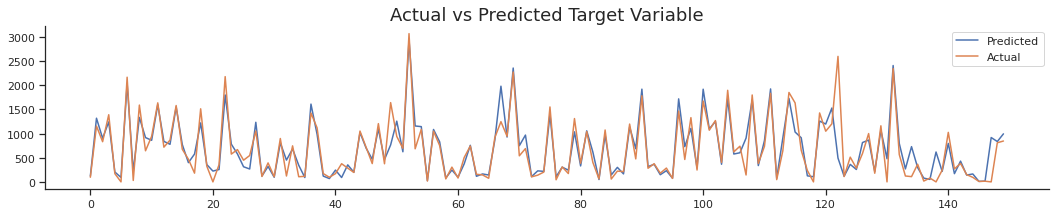

In [49]:
# Define the Regressor model
regressor = KNeighborsRegressor()
# Analysing the regression model 
KNN = analyse_model(regressor, X_train, X_test, y_train, y_test, independent_variables, plotgraph = True)

###  <font  size="+1" color='#144c5c'><b> Model Comparison

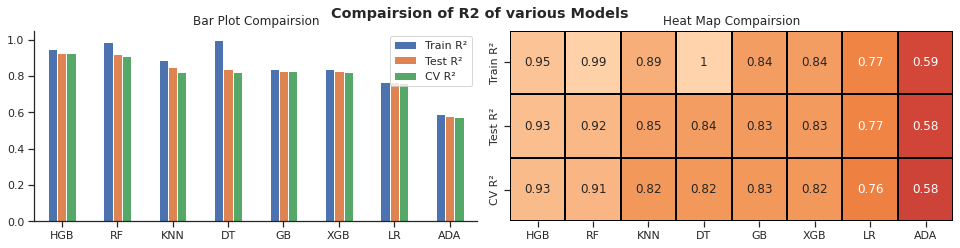

In [50]:
Compare_model()

Selecting the Random Forest model as the Cross validation R2 score and Test R2 score is very high as compare to other models.

###  <font  size="+1" color='#144c5c'><b> Hyperparameter Tuning 

           Train      Test
MSE      2501.43  26827.49
RMSE       50.01    163.79
MAE        29.27     97.89
R²          0.99      0.94
Adj. R²     0.99      0.93

The cross validation R² Score is 0.925.


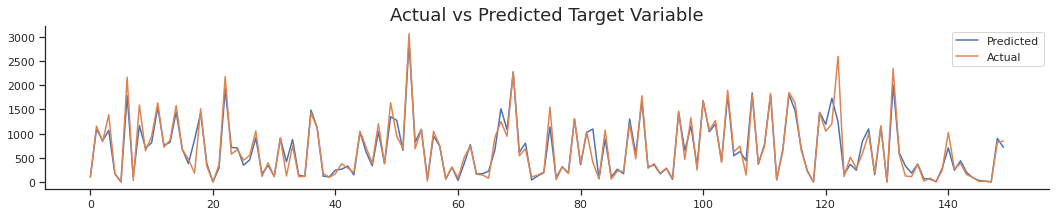

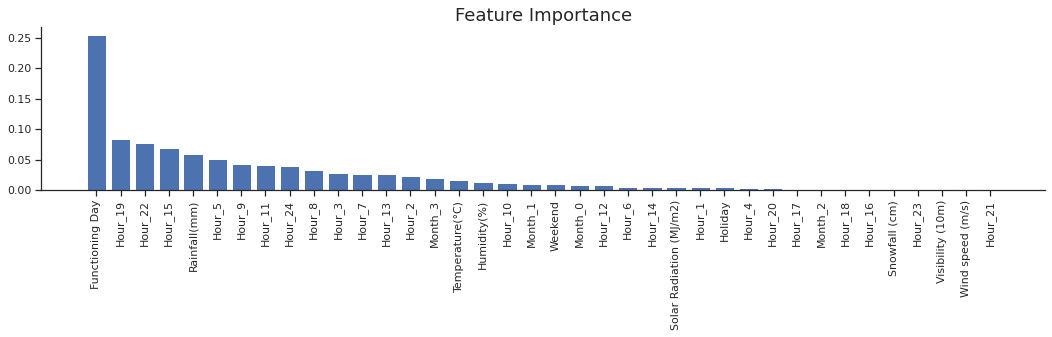

XGBRegressor(eta=0.05, max_depth=10, n_estimators=150,
             objective='reg:squarederror', random_state=3)

In [53]:
# Regressor
regressor = XGBRegressor(random_state=3,objective='reg:squarederror')

# HYperparameter Grid
grid = {'n_estimators' : [50,100,150],
        'max_depth' : [6,8,10],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
xgb.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test, feature = independent_variables, plotgraph = True)

            Train      Test
MSE      17513.90  26728.50
RMSE       132.34    163.49
MAE         79.92    100.42
R²           0.96      0.94
Adj. R²      0.96      0.93

The cross validation R² Score is 0.929.


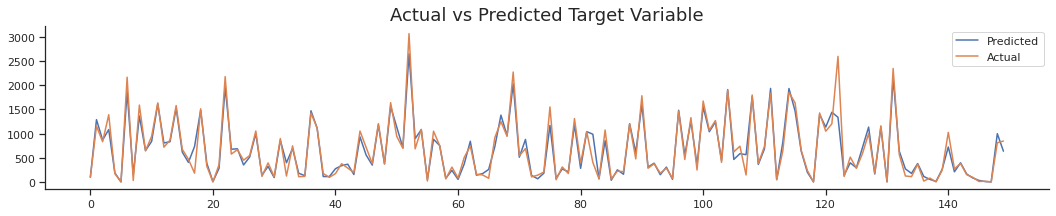

In [58]:
hgb = HistGradientBoostingRegressor(l2_regularization=2.0e-09,
                              learning_rate=0.06, max_iter=512,
                              max_leaf_nodes=18, min_samples_leaf=49,
                              random_state=1,
                              validation_fraction=0.086,
                              warm_start=True)


# Analysing the regression model 
HGB = analyse_model(hgb, X_train, X_test, y_train, y_test, feature = independent_variables, plotgraph = True)

### <font  size="+1" color='#144c5c'><b> Feature Selection

No of columns selected:  37


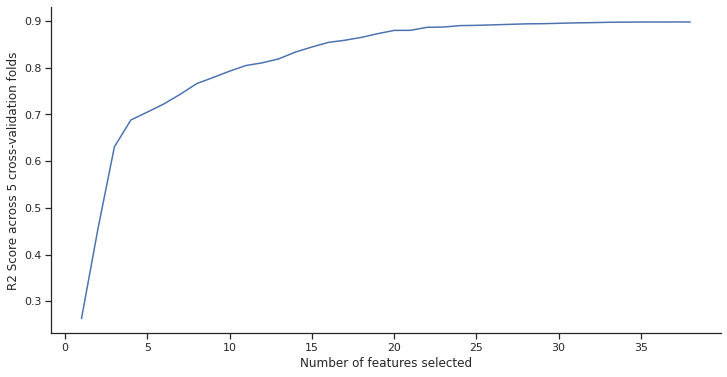

            Train      Test
MSE      27280.79  44675.46
RMSE       165.17    211.37
MAE        100.23    129.38
R²           0.93      0.89
Adj. R²      0.93      0.89

The cross validation R² Score is 0.882.


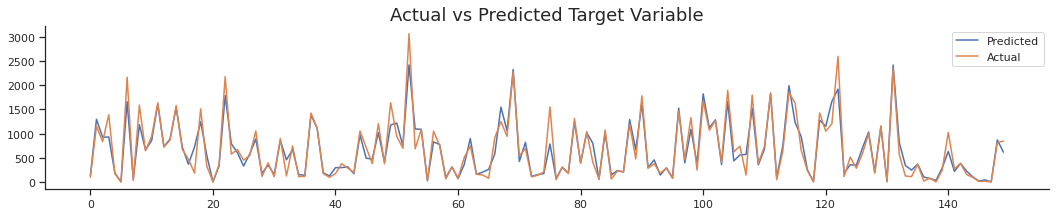

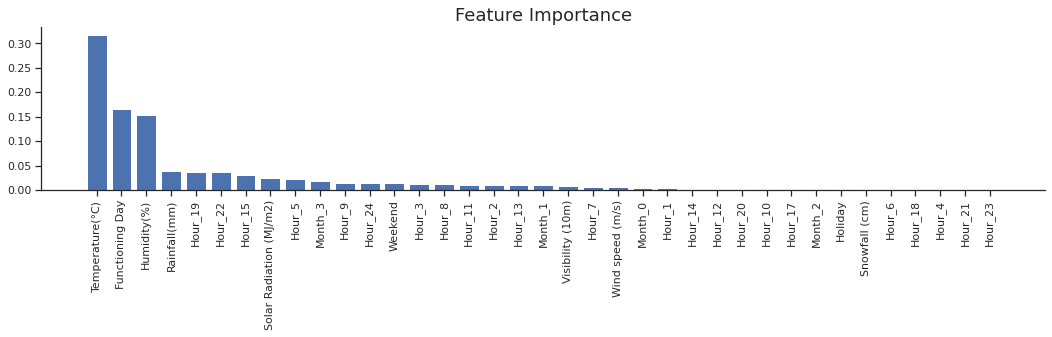

CV Score is 0.88


In [55]:
from sklearn.feature_selection import RFECV

print("="*100)
regressor = RandomForestRegressor(criterion='friedman_mse', max_features=0.9815944450091544,
                      min_samples_leaf=7, min_samples_split=5, n_estimators=512,
                      n_jobs=1, random_state=1, warm_start=True)

rfecv = RFECV(estimator=regressor, scoring='r2')
rfecv.fit(X_train, y_train)
print("No of columns selected: ", rfecv.n_features_)
print("="*100)
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("R2 Score across 5 cross-validation folds")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()
print("="*100)
# selected Feature list
selection = list(X_train.columns[rfecv.support_ ])
# Analysing the model with best set of parametes
model = analyse_model(regressor, X_train[selection], X_test[selection], y_train, y_test, feature = selection, plotgraph = True)

print("="*100)

 
model = Pipeline([
        ('ttr', TransformedTargetRegressor(regressor=regressor, func=np.sqrt, inverse_func=np.square))
        ])
cv_scores = round(cross_val_score(model, X_train[selection], y_train_0, cv=5, scoring = 'r2').mean(),2)
print(f"CV Score is {cv_scores}")
print("="*100)

No of columns selected:  19
            Train      Test
MSE      34640.53  47491.56
RMSE       186.12    217.93
MAE        118.48    137.49
R²           0.92      0.89
Adj. R²      0.92      0.88

The cross validation R² Score is 0.929.


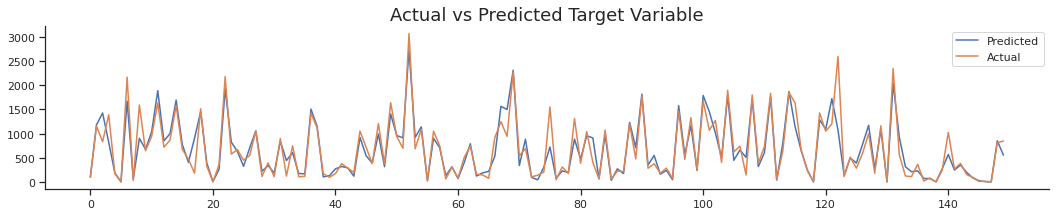

In [57]:
from sklearn.feature_selection import SequentialFeatureSelector

regressor = HistGradientBoostingRegressor(l2_regularization=2.0e-09,
                                          learning_rate=0.06, max_iter=512,
                                          max_leaf_nodes=18, min_samples_leaf=49,
                                          random_state=1,
                                          validation_fraction=0.086,
                                          warm_start=True) 
        
sfs = SequentialFeatureSelector(estimator =regressor, direction="backward")
sfs.fit(X_train, y_train)

selection2 = X_train.columns[sfs.get_support()]
print("No of columns selected: ", len(selection2))
print("="*100)  

hgb = HistGradientBoostingRegressor(l2_regularization=2.003818824240642e-09,
                              learning_rate=0.05999058869944525, max_iter=512,
                              max_leaf_nodes=18, min_samples_leaf=49,
                              random_state=1,
                              validation_fraction=0.08622084565363071,    
                              warm_start=True)

 
# Analysing the regression model 
HGB = analyse_model(hgb, X_train[selection2], X_test[selection2], y_train, y_test, feature = selection2, plotgraph = True)

##  <font  size="+3" color='#144c5c'> <b><u> Conclusion 

1. HistGradientBoostingRegressor gives the best results as compared to all other models. The backward feature selection does not increases the cross validation score but it decreases the test and train accuracy to a great extent, therefore we can avoid it. In case of HistGradientBoostingRegressor we cant see the most influencing feature as it does not support the feature importance attribute.
2. For HistGradientBoostingRegressor, the cross validation R2 is 0.929, Test R2 is 0.93, and train R2 is 0.96.
3. XGBRegressor gives the second best result, with cross validation R2 of 0.925, Test R2 of 0.93, and train R2 of 0.99. The randome forest is the third best model with cross validation R2 score of 0.88, test R2 of 0.89, and train R2 of 0.93.
4. In case of random forest, Temperature, Functioning Day, Humidity % is the most influencing feature. The feature reduction techinque does not give any good result on the accuracy.
5. In case of XGBRegressor, Functioning day, Hour 22, Hour 19, Hour 15 are the most influencing features.
7. The model accuracy can further be increased by stacking.